https://towardsdatascience.com/differentiable-programming-from-scratch-abba0ebebc1c

https://marksaroufim.medium.com/automatic-differentiation-step-by-step-24240f97a6e6

https://towardsdatascience.com/automatic-differentiation-explained-b4ba8e60c2ad

https://pennylane.ai/qml/glossary/parameter_shift.html

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X, y = datasets.load_diabetes(return_X_y=True)
y = (y - np.min(y)) / (np.max(y) - np.min(y))
# Use only one feature
X = X[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:10]
X_test = X[-10:]

# Split the targets into training/testing sets
y_train = y[:10]
y_test = y[-10:]

In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [1.66897496]
Intercept: 
 0.3634012961582006
Mean squared error: 0.02
Coefficient of determination: 0.31


In [8]:
from QVM.qvm_circuit import *
from QVM.qvm_gate import *
import random

In [9]:
def quantum_weight(state, prob):
    x = (4*int(state[0])-2)*prob[0] + (4*int(state[1])-2)*prob[1]
    return x

def errors(x_true, y_true, c_coef, c_intercept):
    return mean_squared_error(y_true, predict(x_true, c_coef, c_intercept))

def random_float(low, high):
    return random.random()*(high-low) + low

def predict(x, c_coef, c_intercept):
    coef = quantum_weight(c_coef.state, c_coef.probabilities())
    intercept = quantum_weight(c_intercept.state, c_intercept.probabilities())
    return coef*x.flatten() + intercept

In [10]:
def linear_circuit(phi):
    circuit = Qubit(1)
    RY(circuit, 0, phi[0])
    RZ(circuit, 0, phi[1])
    return circuit

In [11]:
phi_1 = np.array([random_float(0.2, np.pi-0.2), random_float(0.2, np.pi-0.2)])
phi_2 = np.array([random_float(0.2, np.pi-0.2), random_float(0.2, np.pi-0.2)])
    
c_coef = linear_circuit(phi_1)
c_intercept = linear_circuit(phi_2)

result = errors(X_train, y_train, c_coef, c_intercept)
m = 0

diff_1 = [0, 0]
diff_2 = [0, 0]

for j in range(1000):
    
    for i in range(2):
        phi_1_1 = phi_1.copy()
        phi_1_2 = phi_1.copy()
        phi_1_1[i] += np.pi/20
        phi_1_2[i] -= np.pi/20
        c_coef_1 = linear_circuit(phi_1_1)
        c_coef_2 = linear_circuit(phi_1_2)
        diff_1[i] = (errors(X_train, y_train, c_coef_1, c_intercept)-errors(X_train, y_train, c_coef_2, c_intercept))/(2*np.sin(np.pi/20))
        
    for i in range(2):
        phi_2_1 = phi_2.copy()
        phi_2_2 = phi_2.copy()
        phi_2_1[i] += np.pi/20
        phi_2_2[i] -= np.pi/20
        c_intercept_1 = linear_circuit(phi_2_1)
        c_intercept_2 = linear_circuit(phi_2_2)
        diff_2[i] = (errors(X_train, y_train, c_coef, c_intercept_1)-errors(X_train, y_train, c_coef, c_intercept_2))/(2*np.sin(np.pi/20))
        
    for i in range(2):
            phi_1[i] = phi_1[i] - diff_1[i]/10
            phi_2[i] = phi_2[i] - diff_2[i]/10
            
    c_coef = linear_circuit(phi_1)
    c_intercept = linear_circuit(phi_2)        
    coef = quantum_weight(c_coef.state, c_coef.probabilities())
    intercept = quantum_weight(c_intercept.state, c_intercept.probabilities())
    print(coef, intercept)
            
# print('new result: ',result, 
#       (2*int(state[0])-1)*prob[0]/2 + (2*int(state[1])-1)*prob[1]/2, m)

1.468206357744086 0.44053374320911765
1.4683102370400278 0.3860568239625287
1.4684495829894457 0.3725329232049621
1.4685976257611508 0.36929654200302164
1.4687476419553218 0.3685284619136321
1.4688980189107648 0.36834638333759284
1.469048373990499 0.36830308372601694
1.4691986167344808 0.36829263116088806
1.4693487258727305 0.36828995210334503
1.4694986965080448 0.368289112792347
1.4696485276167617 0.3682887090346728
1.4697982190914325 0.36828840853846445
1.4699477710411513 0.36828813266933813
1.4700971836260275 0.3682878628188835
1.470246457018022 0.36828759458333804
1.470395591391682 0.3682873269203455
1.4705445869219493 0.3682870595830041
1.470693443783647 0.3682867925126453
1.470842162151349 0.3682865256951472
1.470990742199359 0.3682862591269286
1.471139184101701 0.3682859928069039
1.4712874880321172 0.36828572673457827
1.47143565416407 0.3682854609095977
1.4715836826707434 0.36828519533163906
1.4717315737250396 0.3682849300003914
1.4718793274995838 0.36828466491554246
1.472026944

1.5021788704895451 0.36823030680612934
1.5022993300775522 0.3682300907078049
1.5024196855515826 0.36822987479632774
1.502539937032426 0.36822965907148186
1.5026600846406926 0.36822944353304976
1.5027801284968123 0.3682292281808158
1.502900068721035 0.3682290130145647
1.5030199054334321 0.3682287980340787
1.5031396387538951 0.36822858323914487
1.5032592688021378 0.36822836862954755
1.5033787956976945 0.3682281542050724
1.5034982195599234 0.36822793996550374
1.5036175405080034 0.368227725910629
1.503736758660935 0.3682275120402344
1.5038558741375445 0.36822729835410595
1.50397488705648 0.3682270848520315
1.5040937975362128 0.3682268715337973
1.5042126056950373 0.36822665839919166
1.5043313116510766 0.3682264454480022
1.504449915522272 0.368226232680017
1.5045684174263945 0.3682260200950256
1.5046868174810386 0.3682258076928162
1.5048051158036224 0.36822559547317735
1.504923312511394 0.36822538343589983
1.5050414077214254 0.36822517158077206
1.5051594015506127 0.36822495990758464
1.505277

1.530699421337689 0.3681791444482534
1.53079609992744 0.36817897102582786
1.5308927009043187 0.3681787977426716
1.5309892243510768 0.36817862459863815
1.5310856703503541 0.36817845159357865
1.531182038984675 0.368178278727345
1.5312783303364519 0.36817810599978684
1.5313745444879845 0.36817793341075966
1.5314706815214574 0.36817776096011423
1.5315667415189451 0.3681775886477042
1.531662724562409 0.3681774164733813
1.5317586307336968 0.36817724443699906
1.5318544601145472 0.3681770725384115
1.5319502127865814 0.3681769007774709
1.5320458888313158 0.36817672915403155
1.5321414883301507 0.3681765576679473
1.532237011364375 0.36817638631907235
1.5323324580151698 0.3681762151072605
1.532427828363602 0.3681760440323665
1.5325231224906286 0.3681758730942448
1.5326183404770963 0.3681757022927513
1.5327134824037416 0.3681755316277402
1.53280854835119 0.3681753610990661
1.5329035383999583 0.3681751907065858
1.5329984526304519 0.36817502045015393
1.5330932911229673 0.3681748503296278
1.5331880539

1.5546995094525633 0.36813609448946094
1.5547775542931896 0.36813595450210157
1.554855540631137 0.3681358146197087
1.5549334685239138 0.3681356748421799
1.5550113380289543 0.36813553516941255
1.5550891492036234 0.3681353956013024
1.55516690210521 0.3681352561377479
1.5552445967909332 0.3681351167786452
1.5553222333179397 0.3681349775238919
1.555399811743301 0.36813483837338634
1.5554773321240207 0.3681346993270268
1.5555547945170276 0.3681345603847094
1.555632198979181 0.3681344215463326
1.5557095455672652 0.36813428281179483
1.555786834337995 0.36813414418099366
1.5558640653480147 0.3681340056538288
1.5559412386538944 0.36813386723019714
1.5560183543121362 0.3681337289099972
1.556095412379169 0.36813359069312945
1.5561724129113497 0.3681334525794927
1.5562493559649662 0.36813331456898335
1.5563262415962356 0.3681331766615019
1.5564030698613018 0.36813303885694904
1.5564798408162424 0.36813290115522246
1.5565565545170594 0.3681327635562214
1.5566332110196888 0.3681326260598461
1.556709

In [12]:
c_coef = linear_circuit(phi_1)
c_intercept = linear_circuit(phi_2)

result = errors(X_train, y_train, c_coef, c_intercept)

In [13]:
result

0.03960365298084702

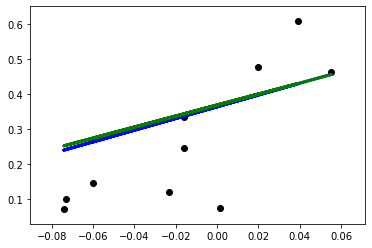

In [14]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.plot(X_test, predict(X_test, c_coef, c_intercept), color='green', linewidth=3)

In [15]:
print(quantum_weight(c_coef.state, c_coef.probabilities()))
print(quantum_weight(c_intercept.state, c_intercept.probabilities()))

1.569686158569532
0.3681092138510528
